# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [2]:
import pandas as pd
import numpy as np

import scipy.stats as spst #상관계수 수치화

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [5]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [3]:
var = 'Sales'

1) 변수의 비즈니스 의미

> 각 지역 판매액(단위 : 1000달러)	

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [4]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> NaN은 존재하지 않음

5) 기초통계량(수치화)

In [5]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

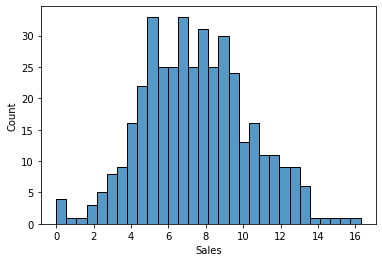

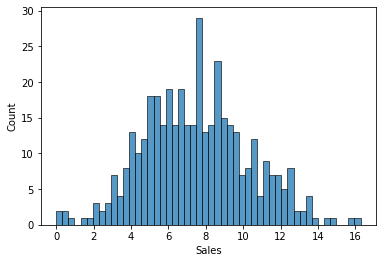

In [6]:
sns.histplot(data[var], bins = 30)
plt.show()
sns.histplot(data[var], bins = 50)
plt.show()

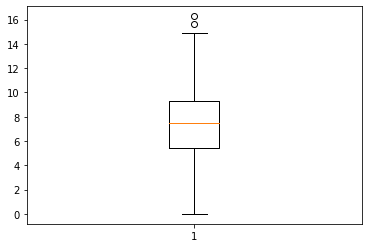

[5.39 0.  ]
[ 9.32 14.9 ]


In [7]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 판매량이 4000달러(?)~ 8000달러(?)가 주축을 이루고 있음
* 4000달러 아래: 판매량 실적이 낮음
* 8000달러 위: 판매량 실적이 높음
* 빈도수를 높여보니 평균인 7000달러가 주축을 이루고 있고, 정규분포를 이루고 있는 것을 보아 카시트 판매량이 없거나 너무 높은 경우 없이 대부분 원만한 판매량을 보이고 있음

8) 추가 분석해 볼 사항이 있나요?

* 평균적인 판매량 기준점을 잡고 그 기준점 보다 낮은, 높은, 적절한지 검토해 대부분지점별로 적절한 판매량을 가지고 있는지 살펴보면 좋을 것 같음
* 판매량에 영향을 미치는 다른 변수들도 고려할 필요 있음
* 특히 낮은 판매량을 가진 지역은 왜그런가에 대한 고찰 필요

### ② CompPrice

In [8]:
var2 = 'CompPrice'

1) 변수의 비즈니스 의미

> 경쟁사 가격(단위 : 달러)	

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [9]:
data[var2].isna().sum()

0

4) 가변수화 필요 여부

> Nan은 존재하지 않음

5) 기초통계량(수치화)

In [10]:
data[var2].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

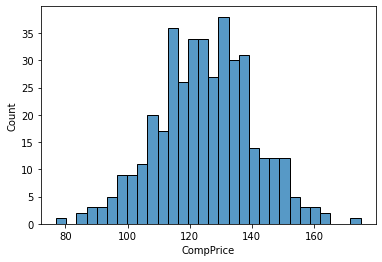

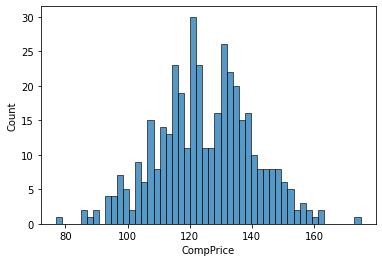

In [11]:
sns.histplot(data[var2], bins = 30)
plt.show()
sns.histplot(data[var2], bins = 50)
plt.show()

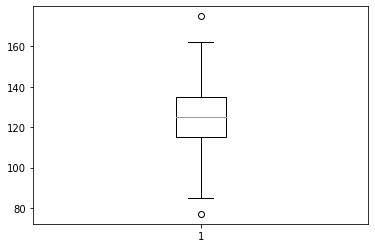

[115.  85.]
[135. 162.]


In [12]:
box = plt.boxplot(data[var2])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

lower_fense = box['whiskers'][0].get_ydata()[1]
upper_fense = box['whiskers'][1].get_ydata()[1]

In [13]:
# 조회하기
# titanic.loc[(titanic['Age']< lower_fense) | (titanic['Age']> upper_fense)]
data.loc[~(data['CompPrice'].between(lower_fense, upper_fense))] # ~(조건절) : 조건절의 반대)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
42,10.43,77,69,0,25,24,Medium,50,Yes,No
310,9.53,175,65,29,419,166,Medium,53,Yes,Yes


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 경쟁사의 평균 판매 가격은 약125달러에 형성 되어있음
* 경쟁사 최소 판매 가격은 75달러
* 경쟁사 최대 판매 가격은 175달러

8) 추가 분석해 볼 사항이 있나요?

* 평균 판매 가격인 125달러
* 최소 판매 가격 77달러, 최대 판매 가격 175달러
* 빈도 수를 높여 보니 평균에 가까운 가격대가 상대적으로 낮은 모습을 보임
* 한 가지 가설은 평균 125달러를 기준으로 판매하지만, 어떤 지점들은 프로모션이나 할인 등으로 평균보다 낮은 가격으로 팔고있고 어떤 지점들은 어떠한 이유(?)로 평균보다 조금 높은 가격대를 가지고 있을 것으로 보임
* 지역별 판매가격과 경쟁사 판매가격을 대조할 필요가 있음

* 자사 가격과 비교 : 
    * 전체 분포 비교
    * 지역별 가격 비교

### ③ Income

1) 변수의 비즈니스 의미

In [14]:
var3 = 'Income'

> 지역 평균 소득(단위 : 1000달러)	

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [15]:
data[var3].isna().sum()

0

4) 가변수화 필요 여부

> Nan은 존재하지 않음

5) 기초통계량(수치화)

In [16]:
data[var3].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

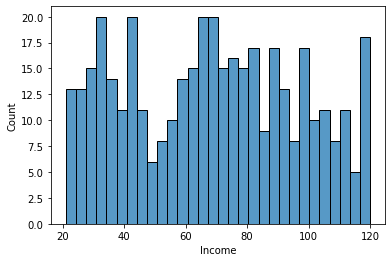

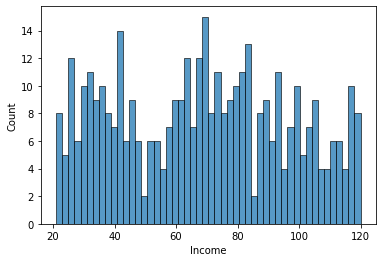

In [17]:
sns.histplot(data[var3], bins = 30)
plt.show()

sns.histplot(data[var3], bins = 50)
plt.show()

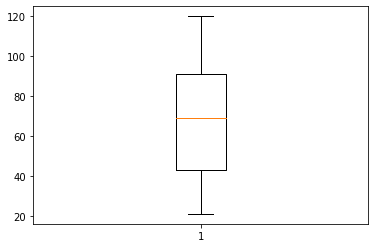

[42.75 21.  ]
[ 91. 120.]


In [18]:
box = plt.boxplot(data[var3])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

<AxesSubplot:title={'center':'Income'}, ylabel='Density'>

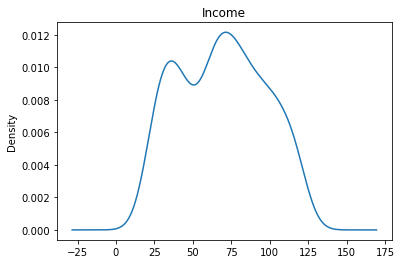

In [19]:
# 밀집도 그래프
plt.title("Income")
data['Income'].plot.kde()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균 소득은 6.8만달러
* 가장 높은 평균 소득은 12만달러
* 가장 낮은 평균 소득은 21달러

8) 추가 분석해 볼 사항이 있나요?

* 평균 소득이 높은 지역일 수록 판매액이 높을까?
* 평균 소득이 높은 지역과 낮은 지역에서 경쟁사 가격차이가 있을까?
* 평균 소득이 높은 지역이 인구 수가 많은가? 아니면 인구 수와는 상관 관계가 없을까?
등..

### ④ Advertising

In [20]:
var4 = 'Advertising'

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산(단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [21]:
data[var4].isna().sum()

0

4) 가변수화 필요 여부

> NaN은 존재하지 않음

5) 기초통계량(수치화)

In [22]:
data[var4].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

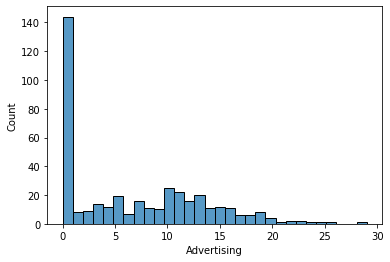

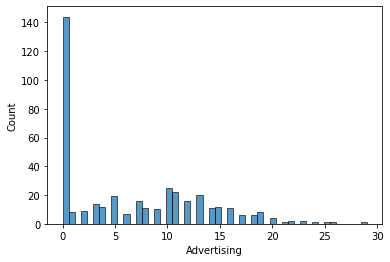

In [23]:
sns.histplot(data[var4], bins = 30)
plt.show()

sns.histplot(data[var4], bins = 50)
plt.show()

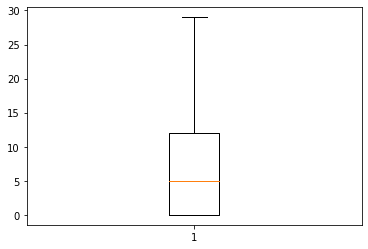

[0. 0.]
[12. 29.]


In [24]:
box = plt.boxplot(data[var4])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.


* 광고비 예산이 0인 지역이 전체의 36퍼센트
* 광고를 한다면 평균적으로 6000달러 정도로 광고 집행 중

8) 추가 분석해 볼 사항이 있나요?

* 광고 집행이 안되어있는 지역의 판매액은 어느정도인지?
    -> 앞에서 판매액이 그래도 고르게 나온 것으로 파악했는데, 광고 집행이 안된 곳을 집중적으로
    판매액이 어느정도인지 검토해서 광고와 판매와의 관계를 파악해볼 필요가 있어보임
* 국내 광고집행이 안되어있는 곳이 많은데도 불구하고 판매량 고름
    -> 광고비 예산 집행할때, 글로벌 진출을 위한 광고 전략 필요

* 광고비 0,5천달러 이내, 5천달러 이상으로 구분하고, 지역, 소득수준, 인구수 등과 비교 필요

### ⑤ Population

In [25]:
var5 = 'Population'

1) 변수의 비즈니스 의미

> 지역 인구수(단위 : 1000명)	

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [26]:
data[var5].isna().sum()

0

4) 가변수화 필요 여부

> NaN은 존재하지 않음

5) 기초통계량(수치화)

In [27]:
data[var5].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

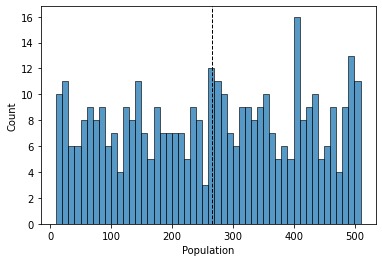

In [28]:
sns.histplot(data[var5], bins = 50)
plt.axvline(data[var5].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

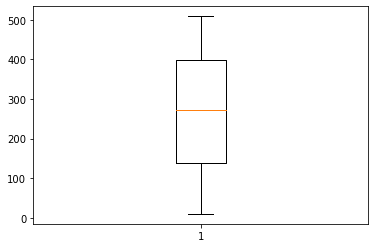

[139.  10.]
[398.5 509. ]


In [29]:
box = plt.boxplot(data[var5])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

<AxesSubplot:title={'center':'Population'}, ylabel='Density'>

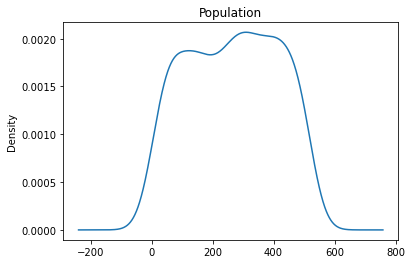

In [30]:
# 밀집도 그래프
plt.title("Population")
data['Population'].plot.kde()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균 지역별로 약 265000명 정도의 인구
* 최소 10000명~ 최대 509000명

8) 추가 분석해 볼 사항이 있나요?

* 인구별로 판매량이 많을까?
* 인구가 많은 곳에 광고집행이 되어있는가? 얼마나 되어있는가?

### ⑥ Price

In [31]:
var6 = 'Price'

1) 변수의 비즈니스 의미

> 자사 지역별 판매가격

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [32]:
data[var6].isna().sum()

0

4) 가변수화 필요 여부

> NaN 존재하지 않음

5) 기초통계량(수치화)

In [33]:
data[var6].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

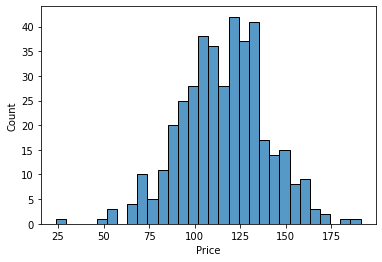

In [34]:
sns.histplot(data[var6], bins = 30)
plt.show()

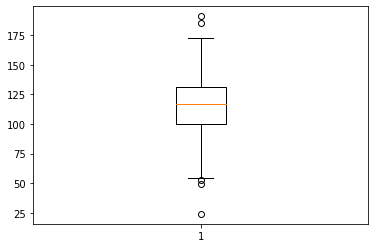

[100.  54.]
[131. 173.]


In [35]:
box = plt.boxplot(data[var6])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 평균 판매 가격인 115달러로 경쟁사 평균 판매 가격인 125달러에 비에 낮음
* 최소 판매 가격은 24달러, 최대 판매 가격은 191달러
* 경쟁사 최대최소 판매 차이는 98달러, 지역 최대최소 판매 가격 차이는 167달러로 경쟁사에 비해 심한 가격 편차가 보임

8) 추가 분석해 볼 사항이 있나요?

* 경쟁사에 비해 극심한 가격 차이가 주는 영향을 분석해볼 필요가 있음
    * 가격에 따른 판매량 비교
    * 자사 가격과 경쟁사 가격 비교

### ⑦ ShelveLoc

In [36]:
var7 = 'ShelveLoc'

1) 변수의 비즈니스 의미

> 진열상태

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [37]:
data[var7].isna().sum()

0

4) 가변수화 필요 여부

NaN은 존재하지 않음

5) 기초통계량(수치화)

In [38]:
shelveloc = pd.Series(data[var7])
print(shelveloc.value_counts())
print('-'*50)
print(shelveloc.value_counts()/len(shelveloc))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
--------------------------------------------------
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

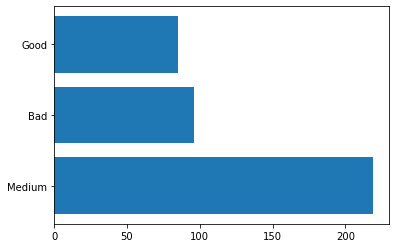

In [39]:
shelveloc = pd.Series(data[var7])
cnt = shelveloc.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

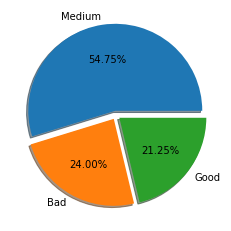

In [40]:
shelveloc = pd.Series(data[var7])
cnt = shelveloc.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05, 0.05], shadow=True)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태의 절반은 기본은 한다는 의미 나머지 55% 중에서 21%는 매우 좋고 나머지 24% 정도는 매우 나쁜상태이다
* 진열 상태가 기본과 좋음을 합쳐서 적어도 90%이상은 되어야 함 

8) 추가 분석해 볼 사항이 있나요?

* 진열 상태가 안 좋은 곳의 판매량은 어떠한가?
* 진열 상태가 좋은 곳의 판매량은 어떠한가?
* 진열 상태가 보통이었을 때 판매량에 영향을 끼치는 것은 무엇일까?

### ⑧ Age

In [5]:
var8 = 'Age'

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [42]:
data[var8].isna().sum()

0

4) 가변수화 필요 여부

> NaN은 존재하지 않음

5) 기초통계량(수치화)

In [43]:
data[var8].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

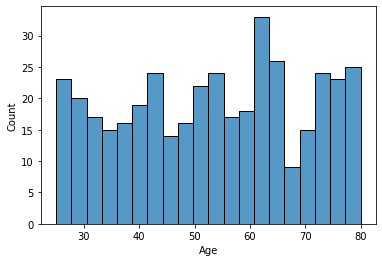

In [9]:
sns.histplot(data[var8], bins = 20)

plt.show()

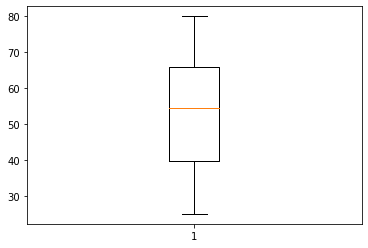

[39.75 25.  ]
[66. 80.]


In [45]:
box = plt.boxplot(data[var8])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 25세~ : 결혼 초, 허니문 베이비
* 평균 구매 연령이 53세로 매우 높음

8) 추가 분석해 볼 사항이 있나요?

* 카시트를 구매하는 연령은 보통 결혼을 해서 자식이 있는 경우라고 생각해서 30~40대가 주축일것이라고 예상했는데, 오히려 50~60대에서 높은 결과가 나온 것으로 미뤄보아 할머니,할아버지가 아이를 낳은 자식에게 카시트를 선물하는 것은 아닐까? 라는 가설을 세워봄
* 단순히 연령대가 아닌 카시트를 직접 구매하는지, 누군가에게 선물을 받는지 그리고 카시트 구매를 고려하는 일반적인 시기(아이를 낳고 언제쯤) 등을 종합적으로 검토해야한다

> 판매량과 지역의 나이간의 상관관계
> * 나이가 많을 수록 판매량이 높을 것이다.

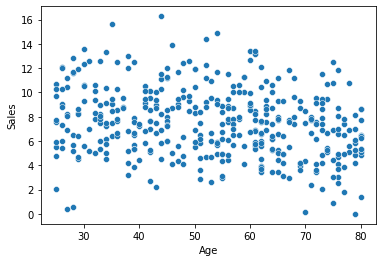

In [11]:
sns.scatterplot(x = 'Age', y = 'Sales', data = data)
plt.show()

### ⑨ Urban

In [46]:
var9 = 'Urban'

1) 변수의 비즈니스 의미

> 도심 지역 여부(0,1)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [47]:
data[var9].isna().sum()

0

4) 가변수화 필요 여부

> NaN은 존재하지 않음

5) 기초통계량(수치화)

In [48]:
urban = pd.Series(data[var9])
print(urban.value_counts())
print('-'*50)
print(urban.value_counts()/len(urban))

Yes    282
No     118
Name: Urban, dtype: int64
--------------------------------------------------
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

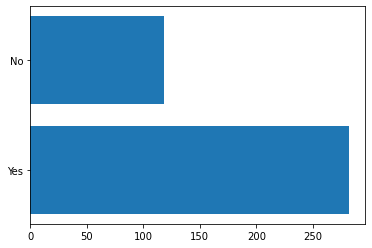

In [49]:
urban = pd.Series(data[var9])
cnt = urban.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

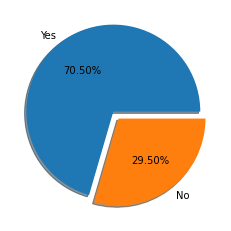

In [50]:
urban = pd.Series(data[var9])
cnt = urban.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05], shadow=True)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 70% 가까이 되는 지역이 도심에 위치해있음
* 도심 지역 위주의 데이터임을 알 수 있음

8) 추가 분석해 볼 사항이 있나요?

* 도심과 도심외 지역의 판매량의 차이가 있는지?
* 도심과 도심외 지역의 인구수와 광고비가 차이가 있는지?
* 도심과 도심외 지역의 판매 가격 차이가 있는지?

### ⑩ US

In [51]:
var10 = 'US'

1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 여부(0,1)

2) 숫자, 범주?

> 범주

3) NaN 존재 유무 및 조치방안

In [52]:
data[var10].isna().sum()

0

4) 가변수화 필요 여부

NaN은 존재하지 않음

5) 기초통계량(수치화)

In [53]:
us = pd.Series(data[var10])
print(us.value_counts())
print('-'*50)
print(us.value_counts()/len(us))

Yes    258
No     142
Name: US, dtype: int64
--------------------------------------------------
Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

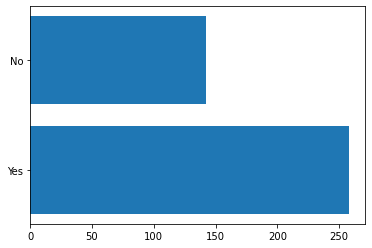

In [54]:
us = pd.Series(data[var10])
cnt = us.value_counts()

plt.barh(cnt.index, cnt.values)
plt.show()

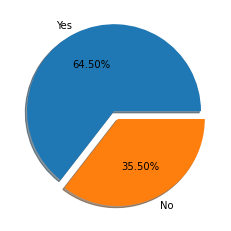

In [55]:
us = pd.Series(data[var10])
cnt = us.value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%',explode = [0.05, 0.05], shadow=True)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 64% 가까이 되는 지역이 미국내에 위치해있음
* 카시트를 파는 브랜드가 미국에서 주로 판매되는 것을 알 수 있음

8) 추가 분석해 볼 사항이 있나요?

* 미국과 미국외 지역에서의 판매차이가 있는가?
* 광고가 없는 지역이 미국 외 지역일까?
* 미국인에게 맞춰진 광고가 이루어져야한다는 것을 알 수 있음
* 미국의 출산률과 육아 트렌드에 대해서 알아볼 필요가 있음
* 국내에 치중 되어있는 느낌? 이게 맞는 양상인지?

[단병량 결론]
1. Age : 생각보다 구매연령이 높음
-> 광고 진행시 고객 타겟층에 맞춰서 선물을 주는 
2. Advertising : 생각보다 광고를 하지 않는 지역이 굉장히 많음
3. Price : 지역 최대최소 판매 가격 차이는 167달러로 경쟁사에 비해 심한 가격 편차가 보임 -> 특가이벤트?떨이? 소비자로 하여금 좋은 이미지를 줘야하는 아기용품 브랜드로서 이미지가 저급하게 보이지 않을까라는 우려가 됨. 따라서, 광고 시 이 점을 보완할 수 있으면 좋을 것 같음
4. US: 국내에 치중 되어 있는 느낌이 듬 -> 국내입지를 많이 다졌으므로 앞으로의 해외진출을 위한 광고 및 마케팅 전략이 필요해보임
5. ShelveLoc : 광고와 별개로 전체적인 매장의 진열 상태에 대한 개선이 필요해 있어보임

## 전체적인 수치 대 수치별로 상관관계를 시각화해서 분석

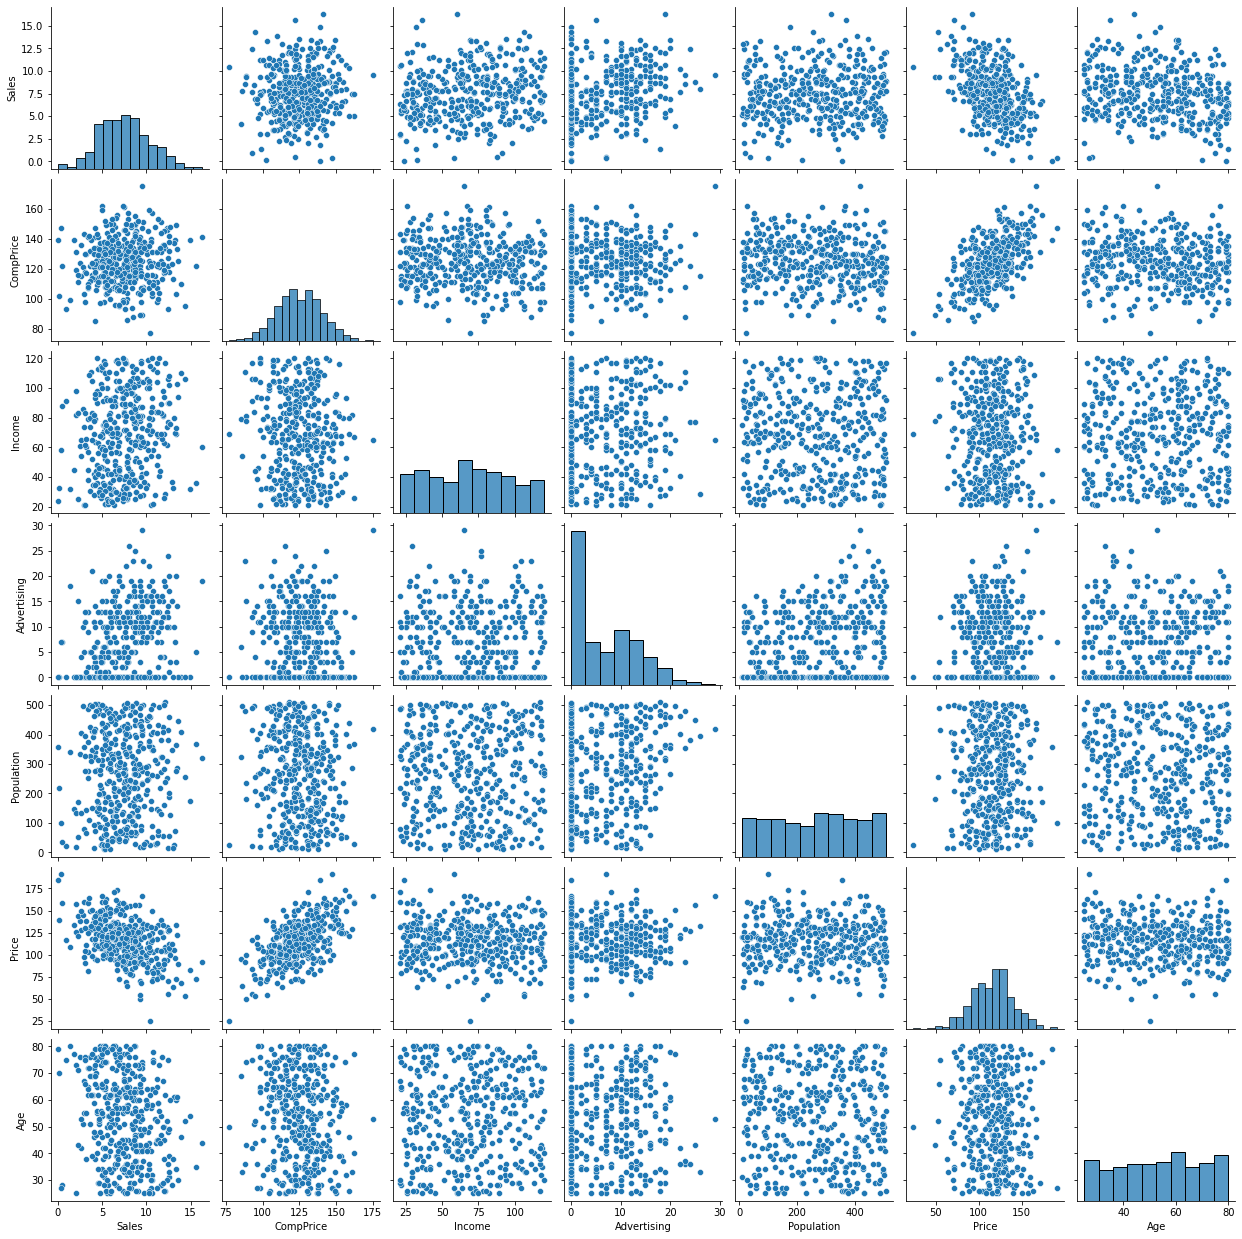

In [13]:
sns.pairplot(data)
plt.show()

### 산점도에서 Sales와 직선의 패턴이 뚜렷하게 보이는 변수
* Price, CompPrice 시각화 

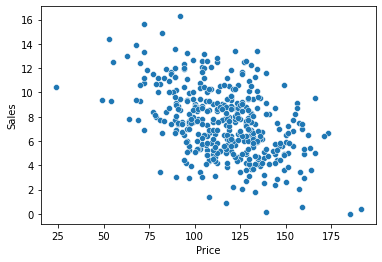

In [16]:
sns.scatterplot(x = "Price", y = "Sales", data = data)
plt.show()

Prcie와 Sales관계 시각화 


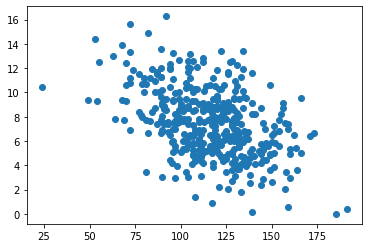

In [7]:
plt.scatter(data['Price'], data['Sales'])
plt.show()

CompPrcie와 Sales관계 시각화 


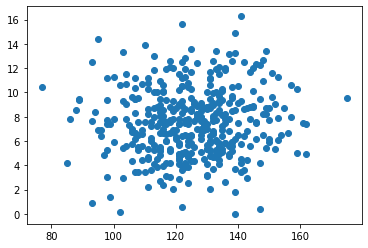

In [9]:
plt.scatter(data['CompPrice'], data['Sales'])
plt.show()

* Price, CompPrice 수치화

In [6]:
data_names = ['CompPrice', 'Price', 'Income', 'Advertising', 'Population']
for i, d in enumerate(data_names) :
    corr = spst.pearsonr(data[d], data['Sales'])
    print(data_names[i])
    print('상관계수 : {:.4f},  P-value : {:.4f}'.format(corr[0], corr[1]))
    print('---------------------------------------')

CompPrice
상관계수 : 0.0641,  P-value : 0.2009
---------------------------------------
Price
상관계수 : -0.4450,  P-value : 0.0000
---------------------------------------
Income
상관계수 : 0.1520,  P-value : 0.0023
---------------------------------------
Advertising
상관계수 : 0.2695,  P-value : 0.0000
---------------------------------------
Population
상관계수 : 0.0505,  P-value : 0.3140
---------------------------------------


> 자사 가격은 편차가 크다보니 가격이 높아지면 판매량이 줄어드는 경향이 보임에 반해,
경쟁사 가격은 상대적으로 편차가 적어서 판매량에 대한 차이가 크기 않다

### 가설 (X : 광고액 Y : 판매량)
* **국내시장에 집중되면 판매량이 감소할 것이다**
* **국내외 광고예산별로 판매량이 다를것이다.**

**국내시장에 집중되면 매출액이 감소할 것이다**

In [21]:
s0 = data.loc[data['US']=='Yes', 'Sales']
s1 = data.loc[data['US']=='No', 'Sales']

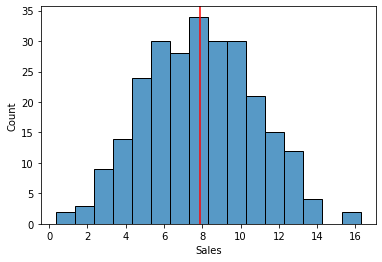

In [22]:
#국내시장에서 매출량 분포
sns.histplot(s0, bins = 16)
plt.axvline(s0.mean(), color='r')
plt.show()

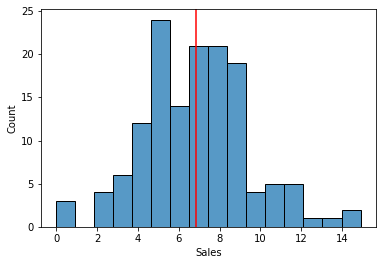

In [23]:
#해외시장에서 매출량 분포
sns.histplot(s1, bins = 16)
plt.axvline(s1.mean(), color='r')
plt.show()

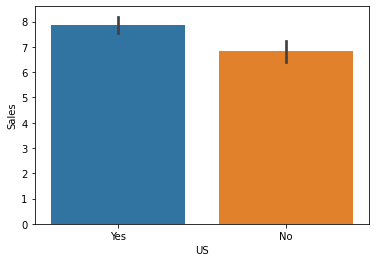

In [26]:
sns.barplot(x = 'US', y = 'Sales', data = data)
plt.show()

두 범주간 평균의 차이가 있다.


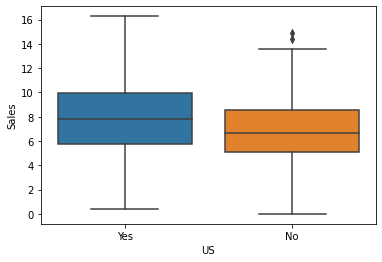

In [28]:
sns.boxplot(x = 'US', y = 'Sales', data = data)
plt.show()

수치화 분석 t-test

In [31]:
#각 범주별 데이터
yes = data.loc[data['US']== 'Yes']['Sales']
no = data.loc[data['US']== 'No']['Sales']

#t-test
result = spst.ttest_ind(yes, no)

print(f"t값 : {result[0]} p-value : {result[1]}")

t값 : 3.589738747802499 p-value : 0.00037233958701471495


t값이 2보다 크고 가설이 틀릴 확률이 5%미만이므로 국내와 해외에서의 경우 매출량의 차이가 유의미하다

**국내외 광고예산별로 판매량이 다를것이다.**

In [10]:
#국내에서 광고
s0 = data.loc[data['US']=='Yes', 'Advertising']
print(len(s0))
#국외에서 광고
s1 = data.loc[data['US']=='No', 'Advertising']
print(len(s1))

258
142


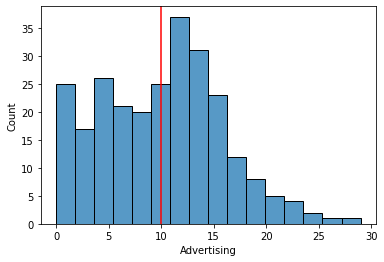

In [34]:
#국내시장에서 광고
sns.histplot(s0, bins = 16)
plt.axvline(s0.mean(), color='r')
plt.show()

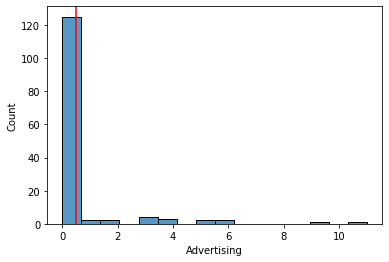

In [35]:
#해외시장에서 광고
sns.histplot(s1, bins = 16)
plt.axvline(s1.mean(), color='r')
plt.show()

In [11]:
# data[(data['US']=='Yes') & (data['Advertising'] == 0)].value_counts()
# print(s0.value_counts())
# data['Advertising'].value_counts()

print(s1.value_counts()) #해외의 광고 투자액이 0인 케이스

0     125
3       4
4       3
2       2
5       2
6       2
1       2
9       1
11      1
Name: Advertising, dtype: int64


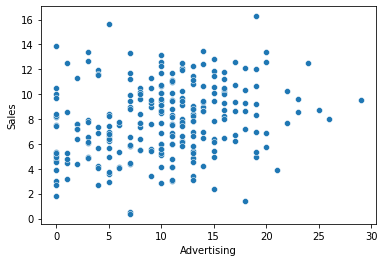

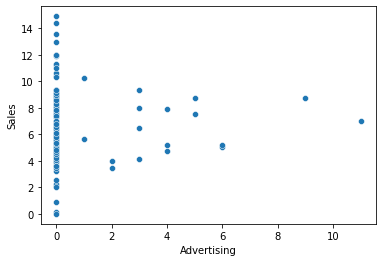

In [48]:
#국내시장에서 광고
sns.scatterplot(x = s0, y = 'Sales',data = data )
plt.show()

sns.scatterplot(x = s1, y = 'Sales',data = data )
plt.show()

In [64]:
#국내 지역 판매량
temp = data.loc[data['US']=='Yes']['Sales']
#국내 지역 판매량과 국내 광고예산간 상관계수
spst.pearsonr(s0, temp)

(0.2557332136720914, 3.22352976377217e-05)

> 국내, 해외 마다 광고 투자금액이 판매량에 영향을 준다고 판단하기는 힘들다.

그렇다면
* 10세 이하 자녀들과 20대후반 ~ 40세의 부모가 주축인 인구의 평균 나이는?
* 가장 판매량이 높은 평균나이는?


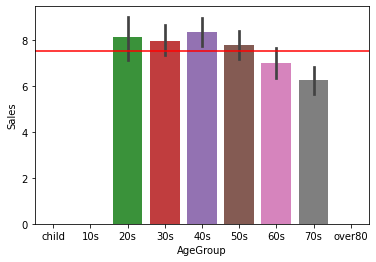

In [169]:
#나이대별 판매량 시각화
temp = data.copy()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, np.inf]
temp['AgeGroup'] = pd.cut(data['Age'], bins= bins, labels=['child', '10s', '20s','30s','40s','50s','60s','70s','over80'])

# t = data.sort_values('Age', ascending = False)
sns.barplot(x="AgeGroup", y = "Sales", data = temp)
plt.axhline(temp['Sales'].mean(), color = 'r')
plt.show()

### 나이대는 판매량에 영향을 준다.

In [170]:
# twenty.isna().sum()
# fifty.isna().sum()
twenty = temp.loc[temp['AgeGroup']== '20s', 'Sales']
fifty = temp.loc[temp['AgeGroup']== '50s', 'Sales']
sixty = temp.loc[temp['AgeGroup']== '60s', 'Sales']

spst.f_oneway(twenty, fifty, sixty)

F_onewayResult(statistic=2.5021861031809887, pvalue=0.08458757510361507)

In [176]:
#가장 판매량이 높은 평균나이?
temp2 = temp.groupby(by=['AgeGroup'], as_index=False).sum()
temp2.sort_values(by=['Sales'], ascending=False)

,AgeGroup,Sales,CompPrice,Income,Advertising,Population,Price,Age
4,40s,575.54,8727,4656,505,19546,7885,3118
5,50s,568.17,9228,4725,457,18102,8390,4045
6,60s,546.63,9509,5751,503,19573,8807,5028
7,70s,481.64,9486,5169,518,20860,8859,5837
3,30s,477.68,7631,4388,419,15954,7161,2127
2,20s,348.87,5409,2774,252,11901,5216,1174
0,child,0.00,0,0,0,0,0,0
1,10s,0.00,0,0,0,0,0,0
8,over80,0.00,0,0,0,0,0,0
